In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Set up the parameters
r = 0.05        # risk-free rate
sigma = 0.5     # volatility
T = 1.0         # time to maturity
S0 = 100        # initial stock price
K = 110         # strike price
B = 90          # barrier level
n = 365         # number of time steps
m = 5000       # number of simulation paths

np.random.seed(0)  # Seed for reproducibility

# Function to simulate one path of GBM
def simulate_gbm(S0, r, sigma, T, n):
    dt = T/n
    prices = [S0]
    for _ in range(n):
        Z = np.random.normal()
        St = prices[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        prices.append(St)
    return np.array(prices)

# Simulate multiple paths
paths = np.array([simulate_gbm(S0, r, sigma, T, n) for _ in range(m)])

# Check if the barrier was crossed in any of the paths
crossed_barrier = np.any(paths <= B, axis=1)

# Calculate the payoff for each path
payoffs = np.exp(-r * T) * np.maximum(paths[:, -1] - K, 0)

# The option payoff only occurs if the barrier has not been crossed
option_payoffs = payoffs * ~crossed_barrier

# Calculate the option price as the average of discounted payoffs
option_price = np.mean(option_payoffs)

# Calculate pathwise sensitivity for Delta and Vega
# Delta: Sensitivity of option price to changes in the underlying asset price
# Vega: Sensitivity of option price to changes in volatility
delta = np.exp(-r * T) * (paths[:, -1] - K > 0) * ~crossed_barrier * paths[:, -1] / S0
vega = np.exp(-r * T) * (paths[:, -1] - K > 0) * ~crossed_barrier * \
       (0.5 * np.log(paths[:, -1]/S0) * T - (r - 0.5 * sigma**2) * T / sigma)

option_delta = np.mean(delta)
option_vega = np.mean(vega)

option_price, option_delta, option_vega

(9.148931277109979, 0.2417455126652326, 0.056321260486581516)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

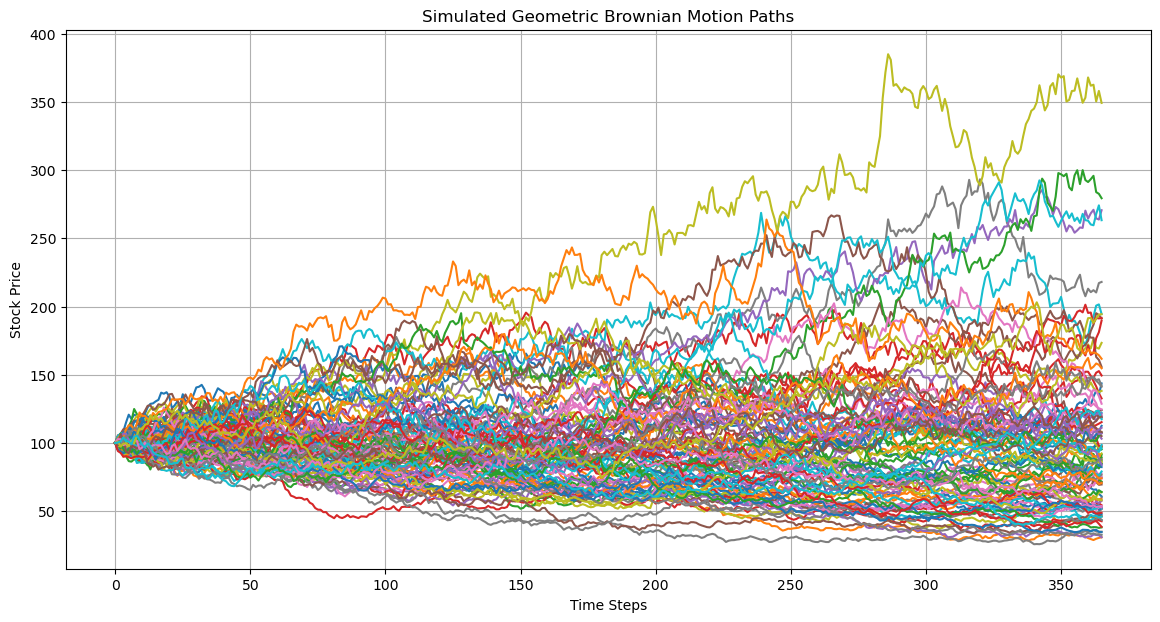

In [8]:
# Plot the first few simulated GBM paths
plt.figure(figsize=(14, 7))

# Plot only the first 10 paths to keep the graph readable
for path in paths[:100]:
    plt.plot(path)

plt.title('Simulated Geometric Brownian Motion Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [3]:
paths

array([[100.        , 104.70344977, 105.78398948, ...,  81.68221892,
         82.39527972,  82.34454816],
       [100.        , 100.40142388,  99.88118002, ...,  29.82778605,
         30.46271721,  30.92816787],
       [100.        ,  98.66584865,  96.56179393, ...,  88.04102075,
         86.34973175,  91.32797566],
       ...,
       [100.        , 101.7908088 , 101.55389507, ..., 162.30777239,
        165.08763473, 157.97923228],
       [100.        ,  98.69513356, 102.48022588, ...,  51.13286589,
         50.14085221,  49.7853279 ],
       [100.        ,  97.82341514,  97.09254066, ...,  38.37283412,
         37.13345026,  36.73226874]])

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
# drift coefficent
mu = 0.05
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.5

In [10]:
np.random.seed(0)
# calc each time step
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

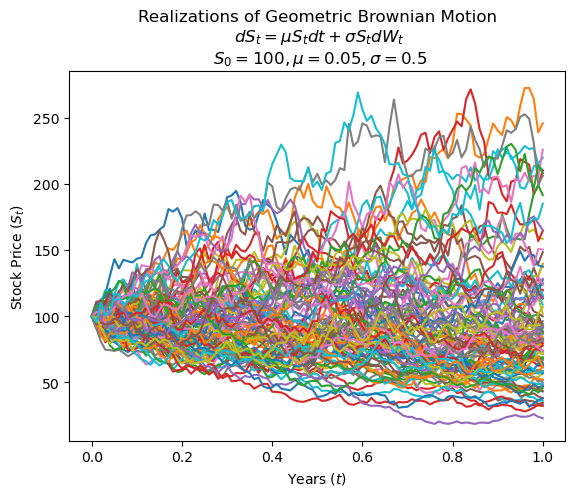

In [11]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()